## 2.1 Алгоритм рекомендацій, Візуалізація даних


#### 1. Завантажити набір даних MovieLens, що прикріплений до репозиторію
#### 2. Зчитати набір даних в PandasDF, для зручності
#### 3. Проаналізуйте зчитані дані
#### 4. Не брати до уваги користувачів, що оцінили лише декілька фільмів

In [2]:
from scipy.sparse.linalg import svds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Зчитування CSV файлу
file_path = 'ratings.csv'
df = pd.read_csv(file_path)

ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')

ratings_matrix = ratings_matrix.dropna(thresh=200, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=100, axis=1)

#### 5. Підготувати дані до застосування SVD. Оскільки відсутні оцінки у нас відображаються як NaN, їх варто замінити на якісь значення.
#### 6. Виконуємо SVD. Для цього можна скористатись функцією

In [3]:
# amend NaN value by avg value for each film
ratings_matrix_filled = ratings_matrix.apply(lambda col: round(col.fillna(col.mean()), 2), axis=0)

R = ratings_matrix_filled.values
user_ratings_mean = np.mean(R, axis=1)

# усунути особливості оцінювання кожним користувачем (адже хотось може ставити нижчі оцінки, хтось вищі на фільм, що однаково сподобався обом)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

U, sigma, Vt = svds(R_demeaned, k=3)

#### 9. Візуалізуємо ці дані, вивівши кожного користувача, як окрему точку в тривимірному просторі.

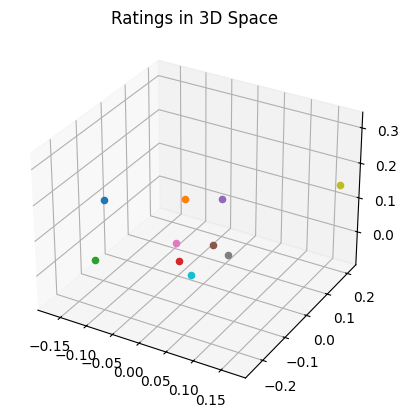

In [4]:
U_ten_users = U[:10]

# Створення тривимірного графіка
U_figure = plt.figure()
axis = U_figure.add_subplot(111, projection='3d')

for i in range(10):
    axis.scatter(U_ten_users[i, 0], U_ten_users[i, 1], U_ten_users[i, 2])

plt.title('Ratings in 3D Space')
plt.show()

#### 13. Візуалізувати матрицю V

[[-0.11381653  0.54729246  0.32043971  0.07378097 -0.06971847 -0.75797814]
 [-0.00712492  0.61707924 -0.77306157  0.06392495 -0.02957104  0.12875334]
 [ 0.46004038 -0.36897908 -0.36192023  0.38504194  0.37095922 -0.48514224]]


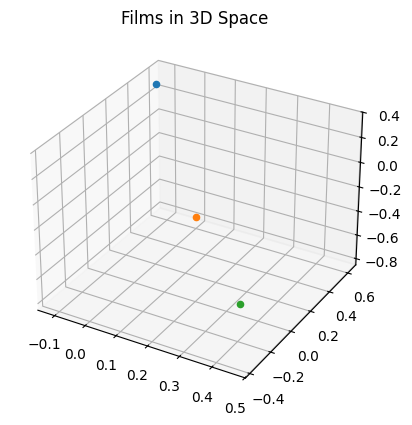

In [5]:
print(Vt)

Vt_fig = plt.figure()
axis = Vt_fig.add_subplot(111, projection='3d')

for i in range(3):
    axis.scatter(Vt[i, 0], Vt[i, 1], Vt[i, 2])

plt.title('Films in 3D Space')
plt.show()